<a href="https://colab.research.google.com/github/Murcha1990/Raiffaizen_ML_summer2023/blob/main/%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_3_grad_methods/Seminar_3_Raiff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План семинара
- Функционалы и метрики
- Кросс-валидация
- Переобучение и регуляризация
- Гиперпараметры и их оптимизация

# Функционалы и метрики

Quick recap

Функционал (или функция потерь == loss function)  - это функция, позволяющая обучить модель (то есть то, что мы стараемся оптимизировать, подбирая параметры модели - в случае линейной регрессии параметры - это веса)

Метрика - это оценка качества модели, которую можно использовать к любым моделям (позволяет ответить на вопрос, насколько точно модель может предсказывать целевую переменную)

Пример: Чтобы обучить линейную регрессию мы можем минизировать функционал MSE

Если мы имеем n наблюдений и k признаков

$$\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2} \rightarrow min_{w}$$

где $$\hat y_{i} = \Sigma_{i=0}^{k}w_{k}x_{ik}$$

А как метрику можем использовать RMSE

$$RMSE = \sqrt{\Sigma_{i=0}^{n}(\hat y_{i} - y_{i})^{2}}$$

Фундаментальное различие функционала и метрик в том, что метрика должна отражать нашу бизнес-задачу или научный вопрос, а функционал должен быть подобран так, чтобы он лучше лучше всего помогал достичь цель (позволял достичь наилучшных показателей метрики или метрик)

Аналогия из обучения:

*  Чтобы сдать математику, мы можем учить производные различных функций, то есть тогда наш функционал - это количество производных, которые мы знаем. А метрикой того, что мы сдали математику будет являться оценка, полученная в конце курса.

*  Оценка в курсе - это понятная метрика, которую нам дал мир. А является ли зубрежка производных лучшим функционалом для достижения поставленной цели решать уже вам, как исследователям

И еще, хотя функционал и метрики - это разные по смыслу и использованию инструменты, они могут быть считаться одинаково (то есть к примеру обучать линейную регрессию можно обучать с помощью функционала MSE, и проверять качество тоже можно с помощью MSE)

In [131]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import fetch_california_housing, load_diabetes

In [132]:
RANDOM_STATE = 42

In [133]:
np.random.seed(42)

In [134]:
import warnings
warnings.filterwarnings('ignore')

In [135]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [136]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [137]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [138]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

col_names = X.columns

X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=col_names)

In [139]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818


In [140]:
# Разобьем данные на обучающую и тестовую выборки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

Populating the interactive namespace from numpy and matplotlib


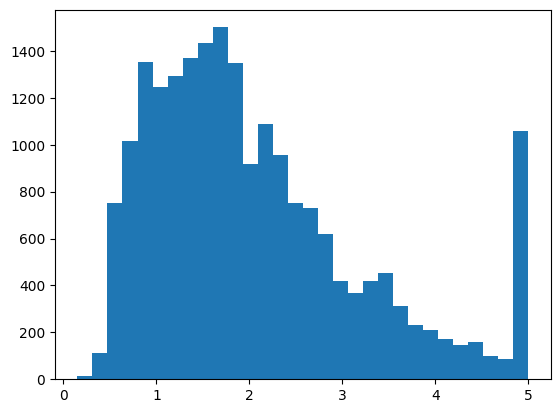

In [141]:
from matplotlib import pylab as plt
%pylab inline

plt.hist(y, bins=30);

Как было рассказано на лекции, линейную регрессию можно обучать с помощью разного функционала (не только MSE, который мы разбирали на прошлом семинаре) и оценивать с помощью разных метрик - закодим это

(array([ 652., 2707., 3084., 2829., 2082., 1325.,  938.,  569.,  356.,
         938.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

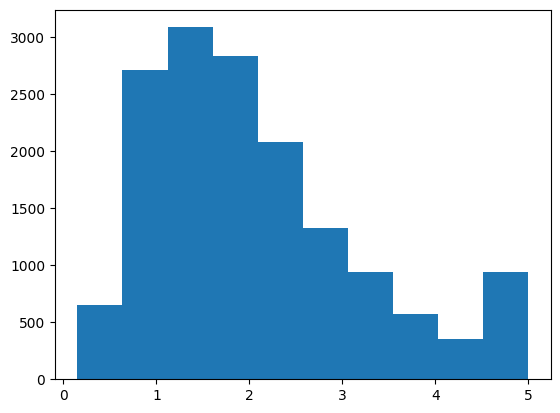

In [142]:
plt.hist(y_train)

(array([ 225.,  905., 1015.,  942.,  717.,  444.,  301.,  183.,  123.,
         305.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

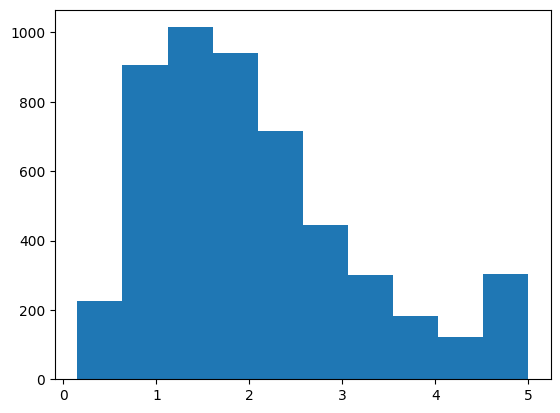

In [143]:
plt.hist(y_test)

## Точное и приближенное решение

Линейную регрессию можно обучать по точной формуле, а можно приближенно (с помощью градиентного спуска).

У точного решения есть недостатки:
* оно считается долго, если данных много
* оно может не посчитаться, если в данных есть линейно-зависимые признаки
* оно есть, только если функция потерь - MSE

Поэтому если данных не много, и мы решаем классическую задачу - используем точное решение.

Во всех остальных случаях - градиентный спуск.

Обучим классическую линейную регрессию по точной формуле и оценим ее качество

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [145]:
lr = LinearRegression() # точное решение

lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [146]:
r2_score(y_test, y_pred_lr)

0.5910509795491351

Оценим переобучение

In [147]:
y_pred_test = lr.predict(X_test)

r2_score(y_test, y_pred_test)

0.5910509795491351

Переобучения нет :)

## Обучение с помощью градиентного спуска

Первый вариант - стандартный - минимизируем MSE.

In [158]:
from sklearn.linear_model import SGDRegressor

lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

lr_mse.fit(X_train, y_train)

y_pred_mse = lr_mse.predict(X_test)

In [159]:
pred_test = lr_mse.predict(X_test)

r2_score(y_test, pred_test)

0.5589067897539538

Теперь попробуем минимизировать MAE

### Задание

*  обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  подберите `learning_rate` и `eta0` так, чтобы получить наилучшее качество на тестовых данных


In [67]:
lr_mae = SGDRegressor(loss='epsilon_insensitive', epsilon=0, max_iter=50000, learning_rate='optimal') # MAE

In [68]:
# your code here

In [69]:
print(f'''MSE loss:
mae={mean_absolute_error(y_test, y_pred_mse)}
mse={mean_squared_error(y_test, y_pred_mse)}
R2={r2_score(y_test, y_pred_mse)}
''')

print(f'''MAE loss:
mae={mean_absolute_error(y_test, y_pred_mae)}
mse={mean_squared_error(y_test, y_pred_mae)}
R2={r2_score(y_test, y_pred_mae)}
''')

MSE loss:
mae=41.59892312119305
mse=2807.4760482888046
R2=0.4922904989440924

MAE loss:
mae=62.88135925794432
mse=5566.640465964932
R2=-0.006682231627696655



Как мы говорили раньше, метрика должна отражать реальную цель из мира, поэтому нередко возникает потребность в написании своих собственных метрик, которые лучше описывают вашу конретную реальность. В задачах, связанных с медициной (как у нас сейчас), довольно высокая цена ошибки (у человека есть диабет, а мы его не нашли). Поэтому для того, чтобы ответить на вопрос, можно ли модель использовать в жизни, имеет смысл использовать метрику максимальной ошибки модели

$max error = max(|\hat y_{i} - y_{i}|)$

In [70]:
def max_error(y_true, y_pred):
    max_erorr = np.abs(y_true - y_pred).max()
    return max_erorr

def quantile_error(y_true, y_pred, q=0.95):
    q_error = np.quantile(np.abs(y_true -  y_pred), q)
    return q_error

# Оценим максимальную ошибку в обоих случаях

print(f'MSE Loss: {max_error(y_test, y_pred_mse)}')
print(f'MAE Loss: {max_error(y_test, y_pred_mae)}')

MSE Loss: 139.54913220850773
MAE Loss: 175.53276834738523


В sklearn есть большое количество уже реализованных метрик - можете посмотреть их список и варианты применения здесь

https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

## Интерпретация прогнозов модели

In [160]:
results = pd.DataFrame({'features' : X_train.columns, 'weights' : lr_mse.coef_})
results = results.sort_values(by='weights')

In [161]:
results

,features,weights
6,Latitude,-0.325407
7,Longitude,-0.284658
5,AveOccup,-0.039155
2,AveRooms,-0.025524
4,Population,0.020038
3,AveBedrms,0.039655
1,HouseAge,0.193023
0,MedInc,0.787808


#  Кросс-валидация

Когда выбран функционал и метрика, можно задаться вопросом: а насколько я могу доверять полученным результатам (значениям метрики), не являются ли они случайности или совпадением ? Кросс-валидация - это инструмент для ответа на этот вопрос.

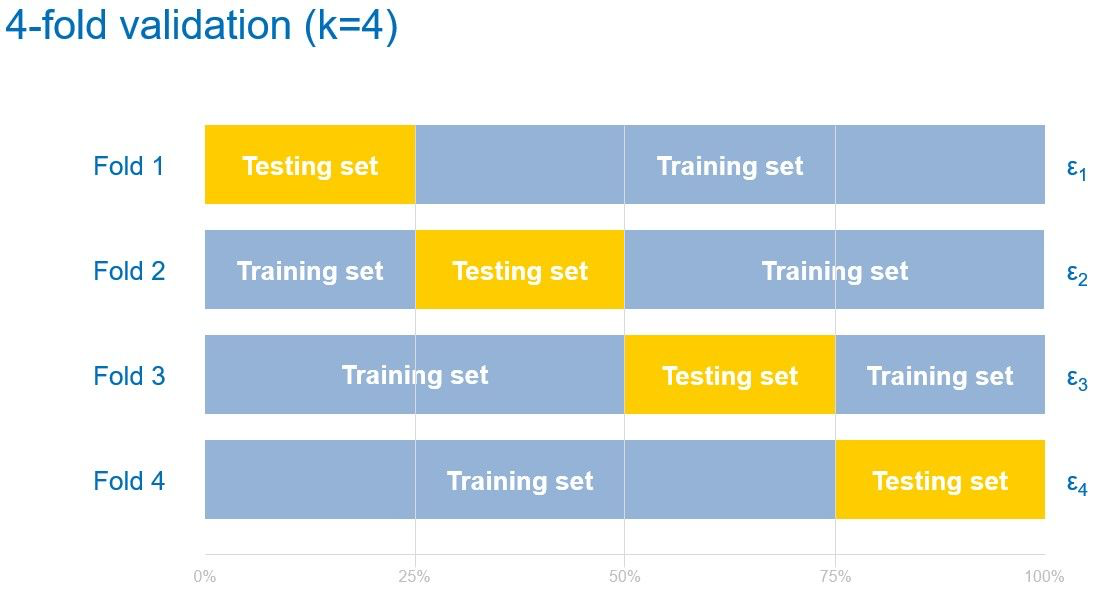

In [162]:
from sklearn.model_selection import cross_val_score

In [163]:
cross_val_score(lr_mse, X, y, cv=5, scoring='r2').mean()

0.5000124962610067

In [164]:
cross_val_score(lr_mse, X, y, cv=5, scoring='neg_mean_squared_error').mean()

-0.6269883586417919

# Немного feature engineering

Один из самых главных источников улучшения качества прогноза модели - это информативный набор признаков.

Попробуем глазами найти интересные зависимости.

In [165]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

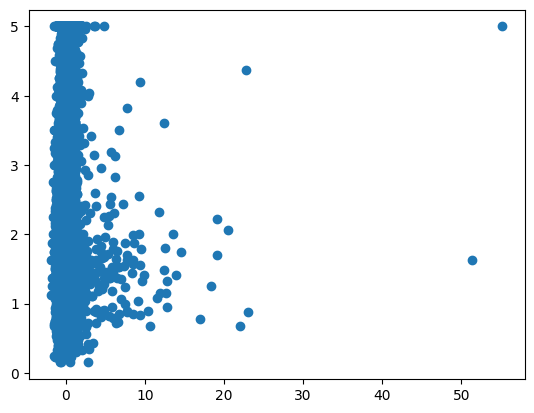

In [169]:
plt.scatter(X['AveRooms'], y)

MedInc


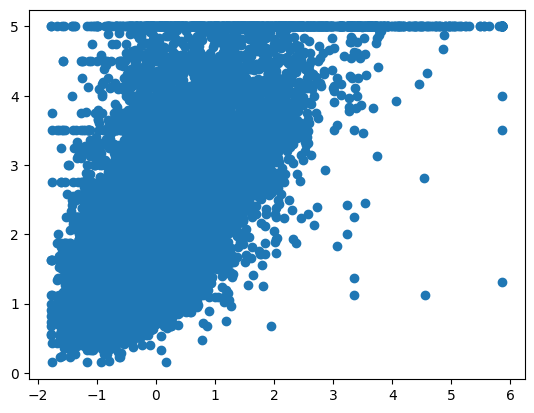

HouseAge


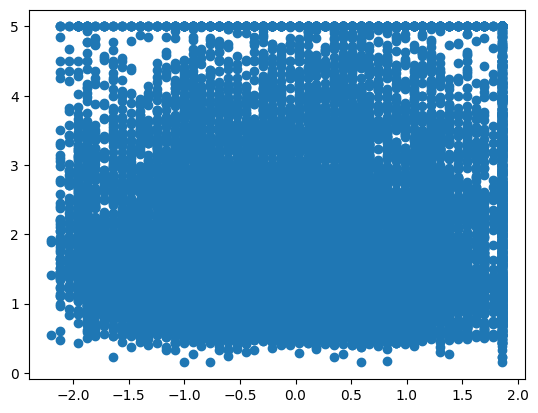

AveRooms


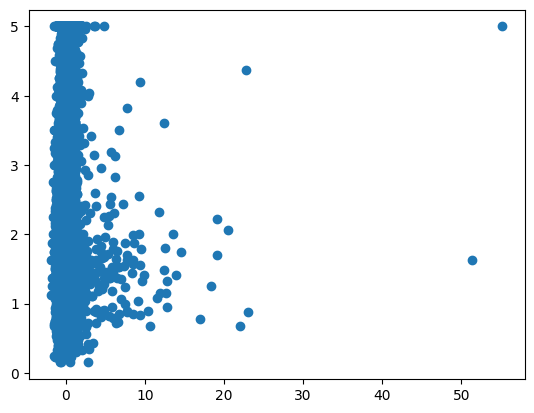

AveBedrms


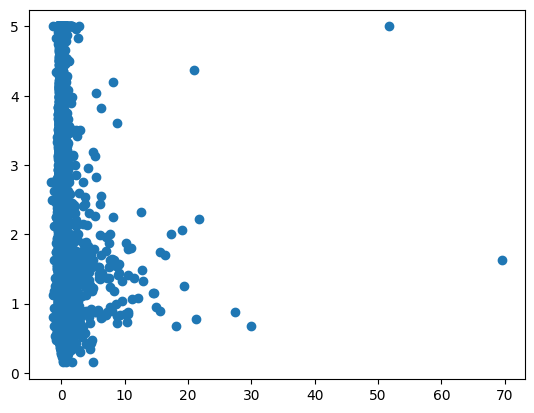

Population


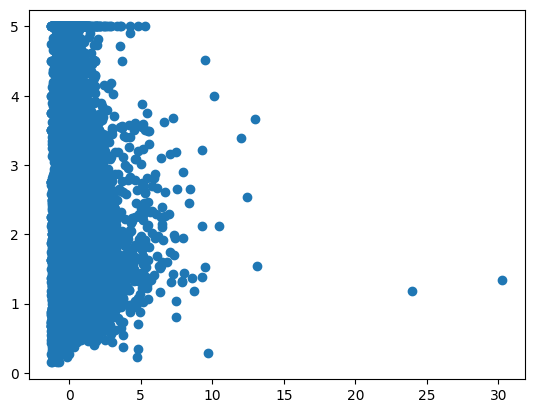

AveOccup


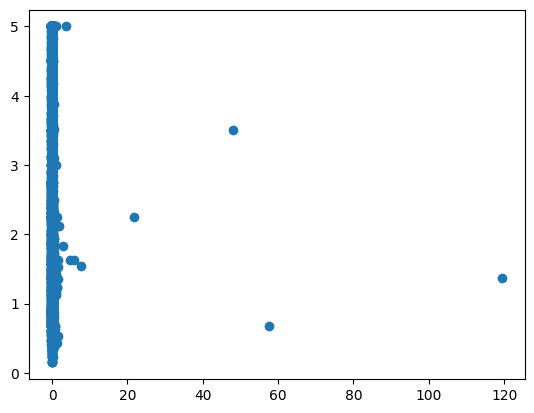

Latitude


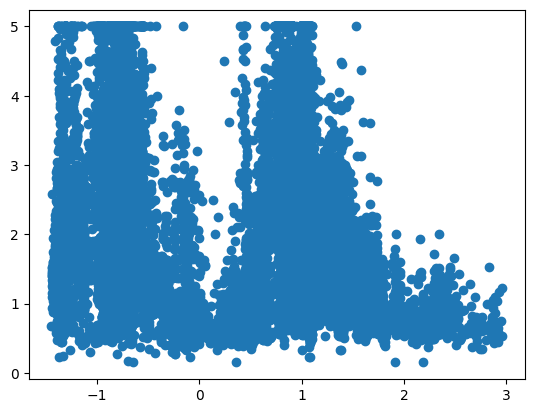

Longitude


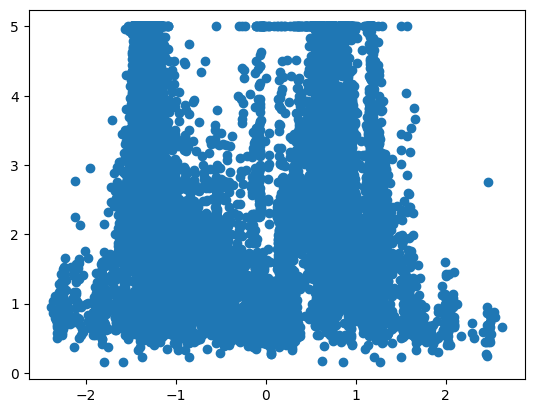

In [168]:
for c in X.columns:
    print(c)
    plt.scatter(X[c], y)
    plt.show()

Добавим новый признак в данные

In [182]:
X["MedInc"] = np.where(X["MedInc"] < 0, 0, X["MedInc"])

In [183]:
X_train['NewInc'] = X_train['MedInc'] ** 0.5
X_test['NewInc'] = X_test['MedInc'] ** 0.5

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

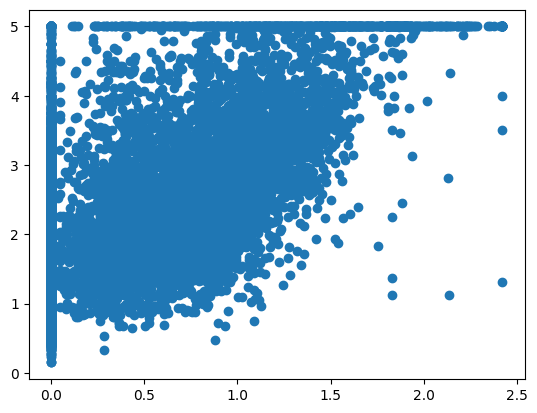

In [189]:
plt.scatter(X_train['NewInc'], y_train)

### Задание

*  заново обучите модель на тренировочных данных
*  сделайте прогноз на тесте
*  выведите на экран ошибку $R^2$ на тесте
*  выведите на экран важность признаков


In [192]:
# your code here

Теперь обогатим наше признаковое пространство попарными произведениями признаков

In [193]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X)

X = poly.transform(X)

In [194]:
X.shape

(20640, 55)

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

In [196]:
X_train.shape, X_test.shape

((15480, 55), (5160, 55))

In [199]:
lr_mse = SGDRegressor(loss='squared_error', max_iter=50000, learning_rate='constant', eta0=0.00001) # MSE

In [200]:
lr_mse.fit(X_train, y_train)

pred = lr_mse.predict(X_test)

r2_score(y_test, pred)

-1.4903985299003207e+21

In [201]:
pred_train = lr_mse.predict(X_train)

r2_score(y_train, pred_train)

-5.324590457833126e+24